In [10]:
import seaborn as sns
import numpy as np





In [11]:
import pandas as pd

In [12]:
# Dataset load karo
titanic = sns.load_dataset('titanic')

In [13]:
# Sirf kaam ke columns select karte hain (Numerical + Categorical)
# pclass (Ticket class), age, sibsp (Siblings), parch (Parents), fare, sex
df1 = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]

print("Data Loaded Successfully!")
print(df1.head())

Data Loaded Successfully!
   survived  pclass     sex   age  sibsp  parch     fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


In [14]:
df=pd.DataFrame(df1)

In [15]:
df.head(8)

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750


In [16]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    str    
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(4), str(1)
memory usage: 52.9 KB


In [17]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

# step 2 cleaning and filling missing values

In [18]:
# 1. Age ki missing values ko Median se bharna (Using fillna)
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

# 2. Sex column ko 0 aur 1 mein badalna (Using replace)
# Female ko 1 aur Male ko 0 assign karte hain
df['sex'] = df['sex'].replace({'female': 1, 'male': 0})

# --- VERIFICATION ---
print("1. Age mein Nulls bache?:", df['age'].isnull().sum())
print("2. Sex column check:\n", df['sex'].value_counts())
print("\nAb data aisa dikh raha hai:")
print(df.head())

1. Age mein Nulls bache?: 0
2. Sex column check:
 sex
0    577
1    314
Name: count, dtype: int64

Ab data aisa dikh raha hai:
   survived  pclass sex   age  sibsp  parch     fare
0         0       3   0  22.0      1      0   7.2500
1         1       1   1  38.0      1      0  71.2833
2         1       3   1  26.0      0      0   7.9250
3         1       1   1  35.0      1      0  53.1000
4         0       3   0  35.0      0      0   8.0500


In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


# ab scaling krni hogi outlier na rhe 

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()

In [22]:
df[['pclass','age','fare']]=scaler.fit_transform(df[['pclass','age','fare']])

In [23]:
print("StandardScaler apply ho gaya! Ab mean 0 ke paas hoga.")
print(df[['age', 'fare','pclass']].head())

StandardScaler apply ho gaya! Ab mean 0 ke paas hoga.
        age      fare  pclass
0  0.271174  0.014151     1.0
1  0.472229  0.139136     0.0
2  0.321438  0.015469     1.0
3  0.434531  0.103644     0.0
4  0.434531  0.015713     1.0


# step 3 training

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
features = ['pclass','age','fare','sex']
X=df[features]
y=df['survived']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()
model.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [29]:
print(f"Accuracy: {model.score(X_test, y_test)*100:.2f}%")

Accuracy: 78.77%


In [30]:
# Features ki importance dekho
importance = pd.DataFrame({'Feature': X.columns, 'Weight': model.coef_[0]})
print(importance.sort_values(by='Weight', ascending=False))

  Feature    Weight
3     sex  2.455013
2    fare  0.449079
1     age -1.378947
0  pclass -1.838196


In [31]:
y_pred=model.predict(X_test)

In [32]:
print("Pehle 10 Predictions:", y_pred[:10])
print("Pehle 10 Asli Jawab (Actual):", y_test[:10])

Pehle 10 Predictions: [0 0 0 1 1 1 1 0 1 1]
Pehle 10 Asli Jawab (Actual): 709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: survived, dtype: int64


# Model confuse hora h ya ni check

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [34]:
cm = confusion_matrix(y_test, y_pred)

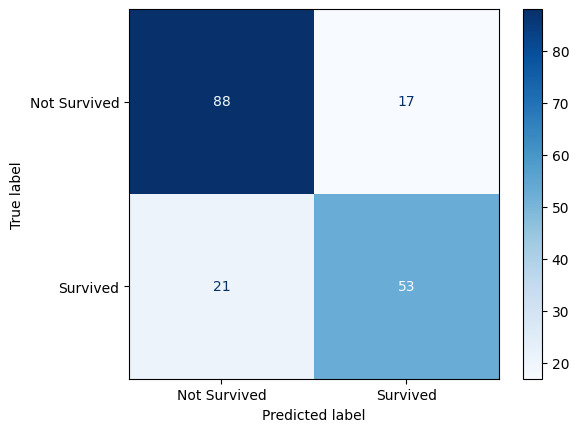

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.show()

# Ab RandomForest se dubara train krenge aur accuracy compare krenge

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [38]:
# 2. Train karo
rf_model.fit(X_train, y_train)

# 3. Naye Predictions nikaalo
y_pred_rf = rf_model.predict(X_test)

# 4. Accuracy check karo
rf_accuracy = accuracy_score(y_test, y_pred_rf)

In [39]:
print(f"Logistic Regression Accuracy: 80.45%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

Logistic Regression Accuracy: 80.45%
Random Forest Accuracy: 79.33%


In [40]:
cm=confusion_matrix(y_test,y_pred_rf)

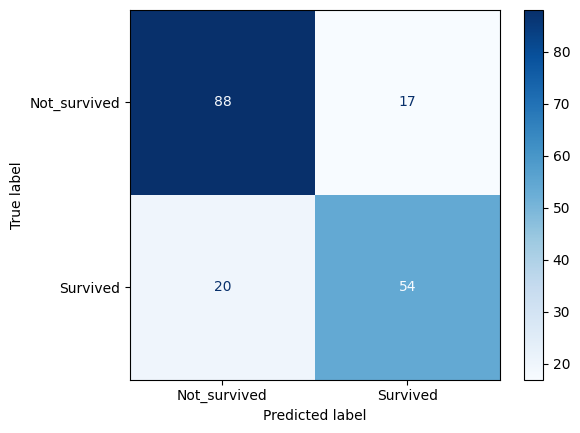

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not_survived','Survived'])
disp.plot(cmap='Blues')
plt.show()

# ache model ne bekar accuracy di ab ise overfitting kehte h aur ab ise thik krne k liye hume hyperparameter tuning krna padega jisme hum model ke parameters ko adjust krke uski performance improve kr sake

In [42]:
# Is baar hum model ko thoda control karenge
# max_depth=5 ka matlab tree bahut zyada gehra nahi jayega (no ratta-mar)
# n_estimators=50 ka matlab 50 trees kafi hain
refined_rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

In [43]:
# Training
refined_rf.fit(X_train, y_train)

# Prediction
y_pred_refined = refined_rf.predict(X_test)

In [44]:
# New Accuracy
new_acc = accuracy_score(y_test, y_pred_refined)
print(f"Refined Random Forest Accuracy: {new_acc * 100:.2f}%")

Refined Random Forest Accuracy: 81.01%


# Pipeline banate hain

In [45]:
# Features (Sawal) aur Target (Jawab)
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

In [46]:
# Split sirf isliye kar rahe hain taaki naya Pipeline inhi par test ho sake
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [48]:
# 1. Numerical Columns ke liye pipeline (Age, Fare)
# Pehle missing values bharo (Imputer), phir scale karo (Scaler)
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [49]:
# 2. Categorical Columns ke liye pipeline (Sex)
# Sirf One-Hot Encoding karni hai
cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [50]:
# 3. Dono ko ek saath jodo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['age', 'fare']),
        ('cat', cat_transformer, ['sex','pclass'])
    ])

In [51]:
# Final Pipeline: Pehle processing hogi, phir model train hoga
my_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42))
])

In [52]:
# Sirf ek line aur model train!
my_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [53]:
# Prediction nikaalo
y_pred_pipe = my_pipeline.predict(X_test)

In [54]:
final_acc = accuracy_score(y_test, y_pred_pipe)

In [55]:
print(f"Pipeline Model ki Accuracy: {final_acc * 100:.2f}%")

Pipeline Model ki Accuracy: 81.56%


In [56]:
import pandas as pd

# 1. Naya data banao (Raw form mein)
new_passenger = pd.DataFrame({
    'pclass': [1],          # 1st Class
    'sex': ['female'],      # Female
    'age': [22],            # 22 saal
    'fare': [500]           # Mehangi ticket
})

# 2. Pipeline se prediction lo (No manual cleaning needed!)
prediction = my_pipeline.predict(new_passenger)

if prediction[0] == 1:
    print("Model kehta hai: Bach Jayenge! 🎉")
else:
    print("Model kehta hai: Mushkil hai... 😟")

Model kehta hai: Mushkil hai... 😟
